# Separación de los datos y selección de características

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import pandas as pd

## Selección de características


### Métodos de filtrado (*Filter methods*)


Los métodos de selección de características de filtro aplican una medida estadística para asignar una puntuación a cada característica. Las características se clasifican según la puntuación y se seleccionan para guardarlas o eliminarlas del conjunto de datos. Los métodos son a menudo univariados y consideran la característica de forma independiente o con respecto a la variable dependiente.

### Métodos de envoltura (*wrapper methods*)

Los métodos de envoltura consideran la selección de un conjunto de características como un problema de búsqueda, donde se preparan, evalúan y comparan diferentes combinaciones con otras combinaciones. Un modelo predictivo que usamos para evaluar una combinación de características y asignar una puntuación basada en la precisión del modelo.

El proceso de búsqueda puede ser metódico, como una búsqueda de primer orden, puede ser estocástico, como un algoritmo aleatorio de escalada, o puede usar heurística, como pases hacia adelante y hacia atrás para agregar y eliminar características.


## Ejemplo *Boston dataset*

In [2]:
# Load the boston dataset
data = datasets.load_boston()

print(data.DESCR)
print(data.data.shape)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:

boston = pd.DataFrame(data.data, columns = data.feature_names)
boston["MEDV"] = data.target

boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
print(boston.shape)

(506, 14)


## Selección del subconjunto de entrenamiento

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(boston, test_size=0.2, random_state=33)

print("Entrenamiento: " + str(train.shape[0]))
print("Test: " + str(test.shape[0]))

Entrenamiento: 404
Test: 102


## Realizamos una regresión con todas las variables

In [6]:
x_train = train.drop(["MEDV"], axis=1)
x_train = x_train.values
y_train = train.MEDV.values.reshape(-1, 1) 

x_test = test.drop(["MEDV"], axis=1)
x_test = x_test.values
y_test = test.MEDV.values.reshape(-1, 1) 


regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients
print('Coefficients:', str(regr.coef_[0][0]))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_pred, y_test))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % r2_score(y_pred, y_test))


solution = pd.DataFrame(list(zip(y_test, y_pred)), columns =["test", "pred"])
solution.head()

Coefficients: -0.1101807522072486
Mean squared error: 22.04
Variance score: 0.6877


,test,pred
0,[20.5],[20.5382604208846]
1,[5.6],[11.407197544025955]
2,[13.4],[12.966031080286736]
3,[12.6],[18.443181057418634]
4,[21.2],[22.637964500631362]


### Ejemplo de filtrado

Vamos a usar el [coeficiente de correlacion de Pearson](http://mathworld.wolfram.com/CorrelationCoefficient.html) para analizar las relaciones entre las diferentes características y seleccionaremos aquella que creamos que nos proporciona mayores probabilidades de éxito.


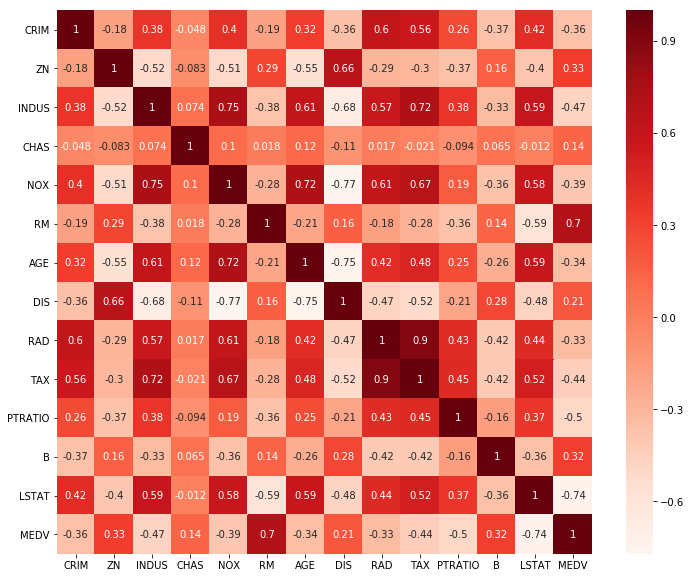

In [7]:
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [8]:
# Correlacion con MEDV
cor_target = abs(cor["MEDV"]) 
relevant_features = cor_target[cor_target>=0.5]
relevant_features

RM       0.699616
LSTAT    0.737263
MEDV     1.000000
Name: MEDV, dtype: float64

Una de las suposiciones de la regresión lineal es que las variables independientes no deben estar correlacionadas entre sí. 

Si estas variables están correlacionadas entre sí, entonces necesitamos mantener solo una de ellas y dejar el resto


In [9]:
print(train[["RM","LSTAT"]].corr())

             RM     LSTAT
RM     1.000000 -0.590499
LSTAT -0.590499  1.000000


Coefficients: -0.9914197492435592
Mean squared error: 33.72
Variance score: 0.43


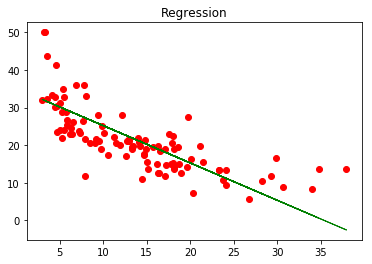

In [10]:
regr = linear_model.LinearRegression()

x_train = train.LSTAT.values.reshape(-1, 1) 
y_train = train.MEDV.values.reshape(-1, 1) 

x_test = test.LSTAT.values.reshape(-1, 1) 
y_test = test.MEDV.values.reshape(-1, 1) 

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients
print('Coefficients:', str(regr.coef_[0][0]))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_pred, y_test))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_pred, y_test))

# Plot outputs
plt.scatter(x_test, y_test,  color='red')
plt.plot(x_test, y_pred, color='green', linewidth=1)
plt.title("Regression")


plt.show()

### Ejemplo selección de características con el método de  envoltura


![alt text](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537549832/Image2_ajaeo8.png "Logo Title Text 1")
Vamos a probar el método conocido como [Recursive Feature Selection](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE):

    Dado un estimador externo que asigna pesos a las características (por ejemplo, los coeficientes de un modelo lineal), el objetivo de la eliminación de características recursivas (RFE) es seleccionar características considerando recursivamente conjuntos de características cada vez más pequeños.


In [33]:
X = train.drop("MEDV",1)   #Características
Y = train["MEDV"]          #Clases   

X_test = test.drop("MEDV",1)   #Características
Y_test = test["MEDV"]          #Clases   

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
229,0.44178,0.0,6.20,0.0,0.504,6.552,21.4,3.3751,8.0,307.0,17.4,380.34,3.76
296,0.05372,0.0,13.92,0.0,0.437,6.549,51.0,5.9604,4.0,289.0,16.0,392.85,7.39
425,15.86030,0.0,18.10,0.0,0.679,5.896,95.4,1.9096,24.0,666.0,20.2,7.68,24.39
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
418,73.53410,0.0,18.10,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62


In [34]:
from sklearn.feature_selection import RFE

# Create the RFE object and rank each pixel
r = linear_model.LinearRegression()
rfe = RFE(estimator=r, n_features_to_select=5, step=1, verbose=1)
rfe.fit(X, Y)



temp = pd.Series(rfe.support_,index = X.columns)
selected_features_rfe = temp[temp==True].index
print("-------------------------------")
print(selected_features_rfe)


Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
-------------------------------
Index(['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO'], dtype='object')


In [39]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    
    model = linear_model.LinearRegression()
    rfe = RFE(model,nof_list[n])
    
    X_train_rfe = rfe.fit_transform(X, Y)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y)
    y_pred = model.predict(X_test_rfe)
    score = r2_score(y_pred, Y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 12
Score with 12 features: 0.687850


In [36]:
# Create the RFE object and rank each pixel
r = linear_model.LinearRegression()
rfe = RFE(estimator=r, n_features_to_select=nof, step=1, verbose=1)
rfe.fit(X, y)


temp = pd.Series(rfe.support_,index = X.columns)
selected_features_rfe = temp[temp==True].index
print("-------------------------------")
print(selected_features_rfe)

Fitting estimator with 13 features.
-------------------------------
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [37]:
regr = linear_model.LinearRegression()

# Separamos los conjuntos
x_train = X[selected_features_rfe]
y_train = y.values.reshape(-1, 1) 

x_test = X_test[selected_features_rfe] 
y_test = Y_test.values.reshape(-1, 1) 

# Train the model using the training sets
regr.fit(x_train, y_train)
score = regr.score(x_test,y_test)
# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients
print('Coefficients:', str(regr.coef_[0][0]))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_pred, y_test))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % r2_score(y_pred, y_test))


Coefficients: -0.11017705187654302
Mean squared error: 22.03
Variance score: 0.6878


### Ejercicio:

En el ejemplo de Scikit de regresión lineal usan un conjunto de datos de la enfermedad de la diabetes. Para poder realizar una visualización solamente usan la primera característica para la regresión.

Se os pide que realizeis un estudio de las características y comprobeis si podeis mejorar los resultados del tutorial.



#### Lecturas adicionales

* [Recursive feature elimination with cross-validation](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py)

* [An Introduction to Feature Selection](https://machinelearningmastery.com/an-introduction-to-feature-selection/)
* [Feature Selection with sklearn and Pandas](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)